# CS4243 - Lab Session 1
Computer Vision & Pattern Recognition

Week 3, Mon 28 Aug, AY 2023/24

Author: Dr. Amirhassan MONAJEMI. Modified by: Lingdong KONG

## Welcome! 👋

This notebook contains the tutorials for the `first` and `second` lab sessions. The following materials are covered:
- Session #1: Background and Global Operations
- Session #2: Local Operations and Spatial Domain Filtering

This week focuses on the first session. We will explore the basic global operations of image processing and how to use them to alter and enhance an image.

### Preparation

Before diving further, you will need to load the following open-source packages.

- `OpenCV-Python` is a library of Python bindings designed to solve computer vision problems. Compared to languages like C/C++, Python is slower. That said, Python can be easily extended with C/C++, which allows us to write computationally intensive code in C/C++ and create Python wrappers that can be used as Python modules. This gives us two advantages: first, the code is as fast as the original C/C++ code (since it is the actual C++ code working in background) and second, it is easier to code in Python than C/C++. OpenCV-Python is a Python wrapper for the original OpenCV C++ implementation. Website: https://docs.opencv.org/4.x/index.html.

- `NumPy` brings the computational power of languages like C and Fortran to Python, a language much easier to learn and use. With this power comes simplicity: a solution in NumPy is often clear and elegant. Website: https://numpy.org.

- `Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Website: https://matplotlib.org.

In [107]:
!pip install opencv-python

In [108]:
!pip install numpy

In [109]:
!pip install matplotlib

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Session #1: Background & Global Operations

### Part 1: Loading and Showing

Read images using `cv2.imread`.

- the first parameter is the *image file name*. Almost all image formats are supported. The seconed parameter is `FLAG`.
- The `FLAG` is optional and can be one of the following possible values:
    - `cv2.IMREAD_COLOR` reads the image with RGB colors but no transparency channel. This is the default value for the flag when no value is provided as the second argument for cv2.imread().
    - `cv2.IMREAD_GRAYSCALE` reads the image as grey image. If the source image is color image, grey value of each pixel is calculated by taking the average of color channels, and is read into the array.
    - `cv2.IMREAD_UNCHANGED` reads the image as is from the source.

In [2]:
im_file = input('Enter the File Name: ')  # /Users/ldkong/Documents/Courses/CS4243/lab/CS4243_2023_images_small/20220719_132627.jpg

Enter the File Name: /Users/ldkong/Documents/Courses/CS4243/lab/CS4243_2023_images_small/20220719_132627.jpg


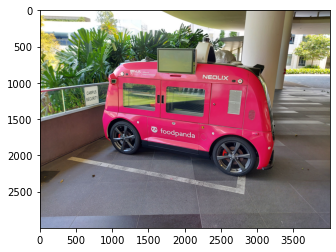

In [3]:
img = cv2.imread(im_file)
img = img[...,::-1]  # convert BGR to RGB
plt.imshow(img)

In [7]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 83,  80,  73],
        [ 85,  82,  73],
        [ 84,  81,  72]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 84,  81,  74],
        [ 85,  82,  73],
        [ 85,  82,  73]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 85,  82,  75],
        [ 84,  84,  76],
        [ 84,  84,  76]],

       ...,

       [[145, 160, 191],
        [146, 161, 192],
        [147, 161, 190],
        ...,
        [ 95,  89,  99],
        [ 96,  91,  98],
        [ 95,  90,  97]],

       [[144, 159, 190],
        [145, 160, 191],
        [146, 160, 189],
        ...,
        [ 94,  88,  98],
        [ 92,  87,  94],
        [ 92,  87,  94]],

       [[145, 160, 191],
        [147, 162, 193],
        [147, 161, 190],
        ...,
        [ 94,  88,  98],
        [ 91,  86,  93],
        [ 90,  85,  92]]

### Part 2: Graylevel Conversion

Convert the image to its grayscale version.

- Use two possible options below to convert a color image to grayscale level.
- To show an image you can use `__imshow` instruction, but dont forget that you also need these two instructions to see the results:
    - `cv2.waitKey()`
    - `cv2.destroyAllWindows()`
- We often put them at the end of our program

In [8]:
gray = cv2.imread(im_file)

### START CODE HERE ### (~1 line)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
### END CODE HERE ###

cv2.imshow('Grayscale', gray)

In [ ]:
# cv2.waitKey()
# cv2.destroyAllWindows()

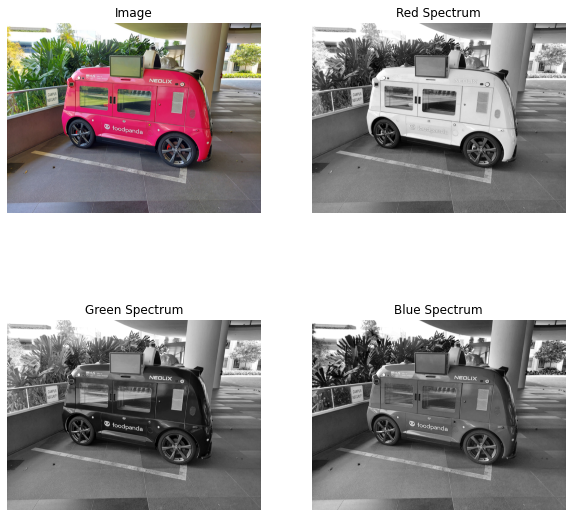

In [25]:
plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(img, cmap='jet'), plt.title('Image'), plt.axis('off') 
plt.subplot(222), plt.imshow(img[:,:,0], cmap='gray'), plt.title('Red Spectrum') , plt.axis('off')
plt.subplot(223), plt.imshow(img[:,:,1], cmap='gray'), plt.title('Green Spectrum'), plt.axis('off')
plt.subplot(224), plt.imshow(img[:,:,2], cmap='gray'), plt.title('Blue Spectrum'), plt.axis('off')

plt.show()

### Part 3: Calculate Image Statistics

Calculate the necessary statistics of an image.

- You can find some useful routines in `utils_2023.ipynb`, or you can develop your own function.
- Example: a function to compute the `power` of an image
    - Using numpy functions will help.
    - Mind integer operations.
    
- Things to do:
    - Compute and print the `power` of your color and grayscale level images.
    - Compute and print the `statistics` of your image, such as the `max`, `min`, `average`, `std` ...

In [73]:
def am_power(a):
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]
        
    ### START CODE HERE ### (~1 line)
    pa = np.sum(a ** 2.0) / sz
    ### END CODE HERE ###
    
    return pa

In [74]:
print('Image Power: Color = %9.3f ,\t Grayscale level = %9.3f' % (am_power(img), am_power(gray)))

Image Power: Color = 17333.527 ,	 Grayscale level = 15541.069


In [75]:
def am_max(a):
    
    ### START CODE HERE ### (~1 line)
    ma = np.max(a)
    ### END CODE HERE ###
    
    return ma

In [76]:
def am_min(a):
    
    ### START CODE HERE ### (~1 line)
    mi = np.min(a)
    ### END CODE HERE ###
    
    return mi

In [77]:
print('maximum = %4d ,   minimum = %4d ' % (am_max(gray), am_min(gray)))

maximum =  255 ,   minimum =    0 


In [78]:
def am_avg(a):
    
    ### START CODE HERE ### (~1 line)
    mv = np.mean(a)
    ### END CODE HERE ###
    
    return mv

In [79]:
def am_std(a):
    
    ### START CODE HERE ### (~1 line)
    ms = np.std(a)
    ### END CODE HERE ###
    
    return ms

In [80]:
print('average = %6.3f ,  STD = %63f' % (am_avg(gray), am_std(gray)))

average = 112.080 ,  STD =                                                       54.581105


### Part 4: Negative Image
Calculate and show the negative of an image.

- Things to do:
    - Show the negative of your color image.
    - Show the negative of your grayscale level image.

In [26]:
### START CODE HERE ### (~1 line)
neg_img = 255 - img.copy()
### END CODE HERE ###

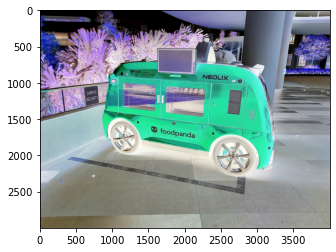

In [27]:
plt.imshow(neg_img)

In [83]:
### START CODE HERE ### (~1 line)
neg_gray = 255. - gray.copy()
### END CODE HERE ###

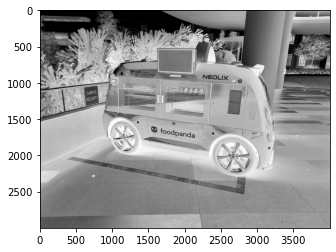

In [84]:
plt.imshow(neg_gray, cmap='gray', vmin=0, vmax=255)

### part 5: Histogram and Dynamic Range
Plot the histogram and calculate the dynamic range of an image.

- Things to do:
    - Select a low contrast image.
    - Calculate and show its histogram.
    - Find the dynamic range of this iamge.
    - Change the dynamic range and show the resulting image.

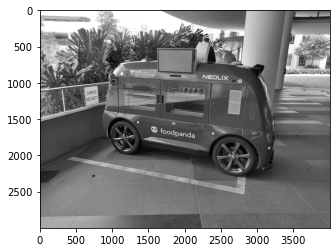

In [10]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

In [11]:
# histogram method in numpy, we convert the 2d image into 1d array and the range of values
# set between 0 and 255, number of bins is 256

### START CODE HERE ### (~1 line)
hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
### END CODE HERE ###

In [12]:
# cummolative distribution function will be computed, using cumsum function
# then we normalize the results.

### START CODE HERE ### (~2 line)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
### END CODE HERE ###

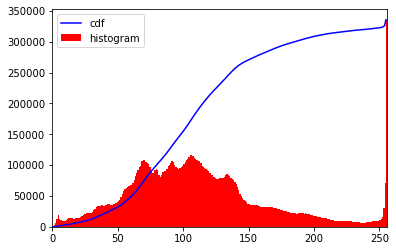

In [13]:
# then the histogram and cdf will be plotted
plt.plot(cdf_normalized, color='b')
plt.hist(gray.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.show()

In [14]:
### START CODE HERE ### (~2 line)
range_min = np.min(img)
range_max = np.max(img)
### END CODE HERE ###

In [15]:
print('dynamic range is between ', range_min, ' and ', range_max)

dynamic range is between  0  and  255


In [16]:
# we divide the pixels' value by 2 to make it even lower contrast

### START CODE HERE ### (~1 line)
gray = gray / 2
### END CODE HERE ###

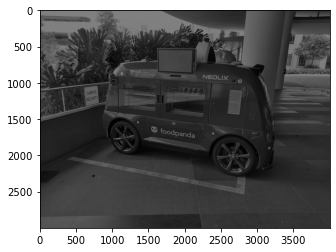

In [17]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

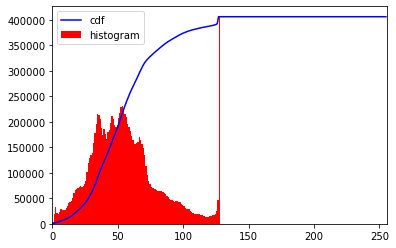

In [92]:
# again, historam nad cdf would be computed and shown
# hist is the histogram, bins is the bins range

### START CODE HERE ### (~1 line)
hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
### END CODE HERE ###

### START CODE HERE ### (~2 line)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
### END CODE HERE ###

plt.plot(cdf_normalized, color='b')
plt.hist(gray.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.show()

In [18]:
# again ... (divide the pixels' value by 2)

### START CODE HERE ### (~1 line)
gray = gray / 2 
### END CODE HERE ###

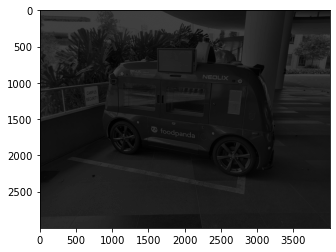

In [19]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

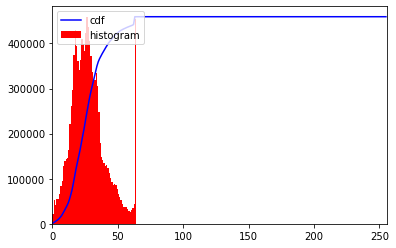

In [94]:
### START CODE HERE ### (~1 line)
hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
### END CODE HERE ###

### START CODE HERE ### (~2 line)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
### END CODE HERE ###

plt.plot(cdf_normalized, color='b')
plt.hist(gray.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.show()

### Part 6: Histogram Operations
Explore histogram operation for image enhencement.

- Things to do: 
    - Retrieve the original low contrast image.
    - Improve the contrast using histogram equalization, e.g. the `cv2.equalizeHist` function.
    - Show the resulting image and its histogram.

In [20]:
gray = cv2.imread(im_file)

### START CODE HERE ### (~1 line)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
### END CODE HERE ###

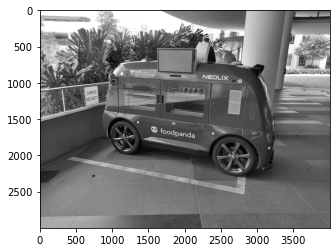

In [21]:
# show the original grayscale image
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

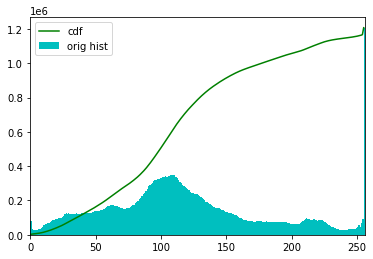

In [22]:
# original image histogram

### START CODE HERE ### (~1 line)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
### END CODE HERE ###

### START CODE HERE ### (~2 line)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
### END CODE HERE ###

plt.plot(cdf_normalized, color='g')
plt.hist(img.flatten(), 256, [0, 256], color='c')
plt.xlim([0, 256])
plt.legend(('cdf','orig hist'), loc='upper left')
plt.show()

In [96]:
# histogram equalization
# results of division will be converted to uint8
# opencv equalizeHist function to equalize the hist

### START CODE HERE ### (~1 line)
equ = cv2.equalizeHist(np.uint8(gray))
### END CODE HERE ###

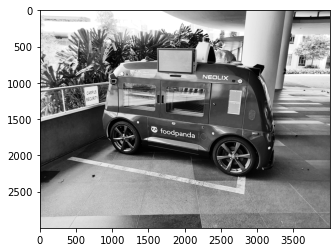

In [97]:
plt.imshow(equ, cmap='gray', vmin=0, vmax=255)

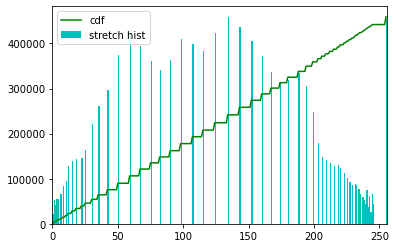

In [98]:
# equalized image histogram and its cdf

### START CODE HERE ### (~1 line)
hist, bins = np.histogram(equ.flatten(), 256, [0, 256])
### END CODE HERE ###

### START CODE HERE ### (~2 line)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
### END CODE HERE ###

plt.plot(cdf_normalized, color='g')
plt.hist(equ.flatten(), 256, [0, 256], color='c')
plt.xlim([0, 256])
plt.legend(('cdf','stretch hist'), loc='upper left')
plt.show()

### Part 7: Zoom !
Try to realize which zoom in/out algorihms are better.

- Things to do:
    - Read an image.
    - Select one of the zoom/interpolation algorithms.
    - Zoom the image OUT with `scale=0.25`.
    - Zoom the image IN with `scale = 4` to regain the original size.
    - Compare the original image with the zoomed out/in versions using the absolut difference.
    - Is it a good way to evaluate the different zoom/interpolation algorithms?

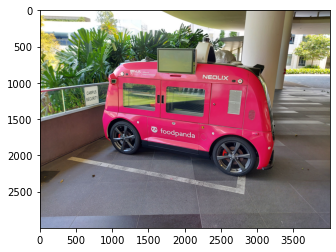

In [23]:
plt.imshow(img)

In [24]:
M = img.shape
print("Image size: {}".format(M))

Image size: (3000, 4000, 3)


In [99]:
# using opencv's resize function
# scale factors are fx=fy=2, to zoom in x2
# zoom algorithm is INTER_CUBIC

### START CODE HERE ### (~1 line)
res1 = cv2.resize(img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)
### END CODE HERE ###

Image size: (750, 1000, 3)


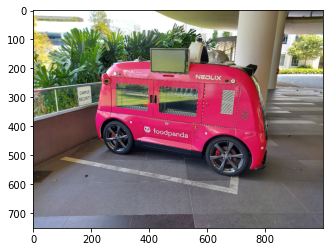

In [100]:
print("Image size: {}".format(res1.shape))
plt.imshow(res1)

The `interpolation` flag can take one of the following methods:
- `INTER_NEAREST` – a nearest-neighbor interpolation 
- `INTER_LINEAR` – a bilinear interpolation (used by default) 
- `INTER_AREA` – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the `INTER_NEAREST` method. 
- `INTER_CUBIC` – a bicubic interpolation over 4×4 pixel neighborhood 
- `INTER_LANCZOS4` – a Lanczos interpolation over 8×8 pixel neighborhood

In [101]:
### START CODE HERE ### (~1 line)
res2 = cv2.resize(res1, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
### END CODE HERE ###

Image size: (3000, 4000, 3)


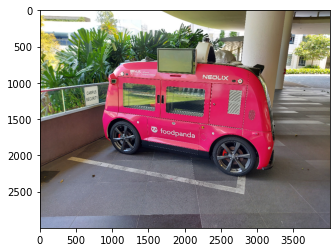

In [102]:
print("Image size: {}".format(res2.shape))
plt.imshow(res2)

In [103]:
# compare the original image with the zoomed out/in versions
# using the absolute difference
def diff(img, res):
    
    ### START CODE HERE ### (~2 line)
    adiff = np.mean(abs(img - res))
    msdiff = np.mean((img - res)**2)
    ### END CODE HERE ###
    
    return adiff, msdiff

In [104]:
# cubic

### START CODE HERE ### (~2 line)
res1 = cv2.resize(img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)
res2 = cv2.resize(res1, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
### END CODE HERE ###

adiff, msdiff = diff(img, res2)

print("Absolute Diff: {:.2f}, MSE Diff: {:.2f}".format(adiff, msdiff))

Absolute Diff: 100.71, MSE Diff: 23.56


In [105]:
# nearest

### START CODE HERE ### (~2 line)
res1 = cv2.resize(img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_NEAREST)
res2 = cv2.resize(res1, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
### END CODE HERE ###

adiff, msdiff = diff(img, res2)

print("Absolute Diff: {:.2f}, MSE Diff: {:.2f}".format(adiff, msdiff))

Absolute Diff: 99.67, MSE Diff: 30.59


In [106]:
# linear

### START CODE HERE ### (~2 line)
res1 = cv2.resize(img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
res2 = cv2.resize(res1, None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
### END CODE HERE ###

adiff, msdiff = diff(img, res2)

print("Absolute Diff: {:.2f}, MSE Diff: {:.2f}".format(adiff, msdiff))

Absolute Diff: 99.82, MSE Diff: 22.75


### 🎉 Congratulations! You have finished this lab tutorial.

<hr>

## What's Next?

Things to do in the following session:

# Local Operations and Spatial Domain Filtering 

### Part 8: Filtering, LP, and HP
Read an image, design some filters like the filters that you can see below.
- Filter your image with those filters. Use the `cv2.filter2D` instruction.
- See the resulting image and compute its power and entropy
- Check different arguments of that filter2D function

### Part 9: Sobel Operator
Develop a Sobel edge detection program and test it on images below.

- For each image show and see the edge strength and edge direction matrices. 

### Part 10: Simplified Sobel Operator
Run sobel code below and check these two images.

- For each image review the edge strength and edge direction matrices.
